In [36]:
import random

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [4]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print()
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)

Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [7]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

In [8]:
train_images /= 255
test_images /= 255

In [10]:
test_labels = to_categorical(test_labels, 10)
train_labels = to_categorical(train_labels, 10)

In [15]:
callbacks = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)

# Building the models

In [16]:
model1 = Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(130, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model1.fit(
    train_images,
    train_labels,
    epochs=200,
    callbacks=[callbacks],
    validation_split=0.2,    
)

Epoch 1/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8984 - loss: 0.3281 - val_accuracy: 0.9772 - val_loss: 0.0745
Epoch 2/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.9835 - val_loss: 0.0587
Epoch 3/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9889 - loss: 0.0325 - val_accuracy: 0.9848 - val_loss: 0.0488
Epoch 4/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9843 - val_loss: 0.0584
Epoch 5/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9838 - val_loss: 0.0624
Epoch 6/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9836 - val_loss: 0.0593
Epoch 7/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9843 - val_loss: 0.0696
Epoch 8/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 

In [18]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 130)                 │       1,406,210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,224,482 (16.12 MB)

 Trainable params: 1,408,160 (5.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,816,322 (10.74 MB)

In [19]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9774 - loss: 0.0617


In [22]:
test_acc = round(test_acc * 100, 2)
test_acc

98.31

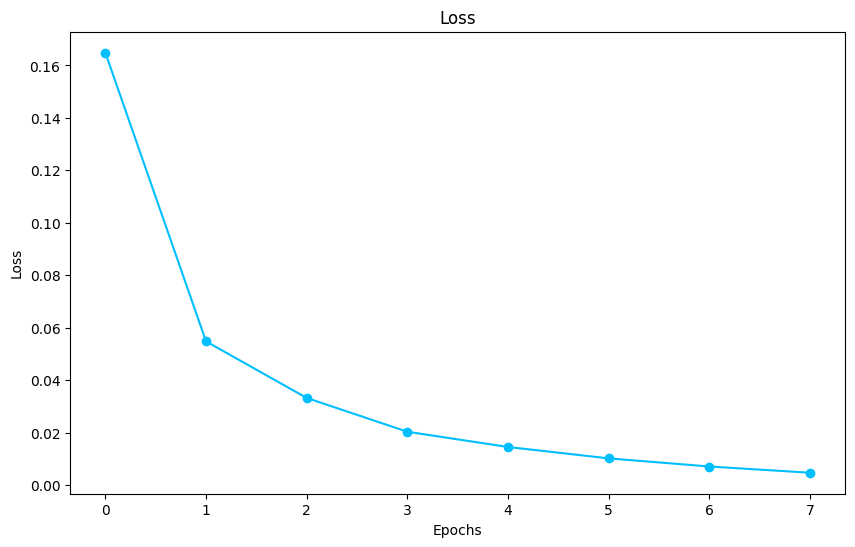

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history["loss"], color="deepskyblue", marker="o")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

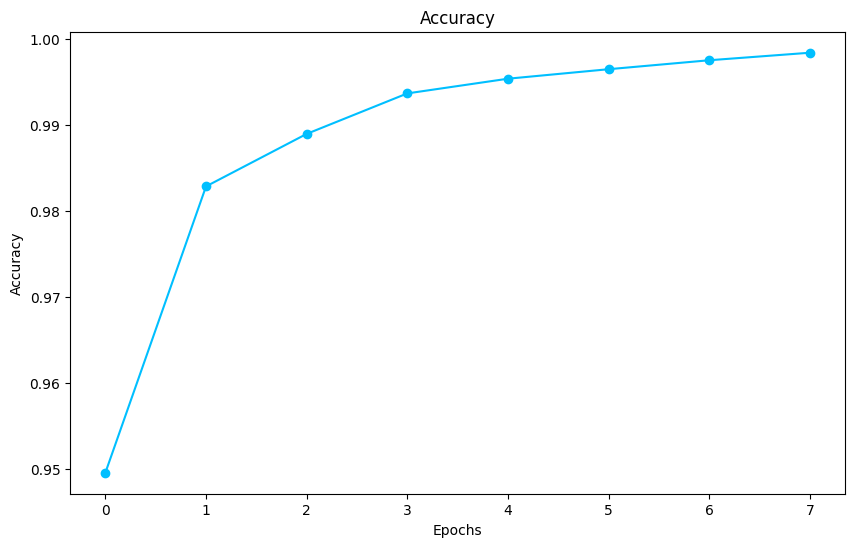

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history["accuracy"], color="deepskyblue", marker="o")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs");

# Model Prediction

In [28]:
predictions = model1.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [33]:
predictions.shape

(10000, 10)

In [29]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
print(test_labels[11])
print(numbers[np.argmax(predictions[11])])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


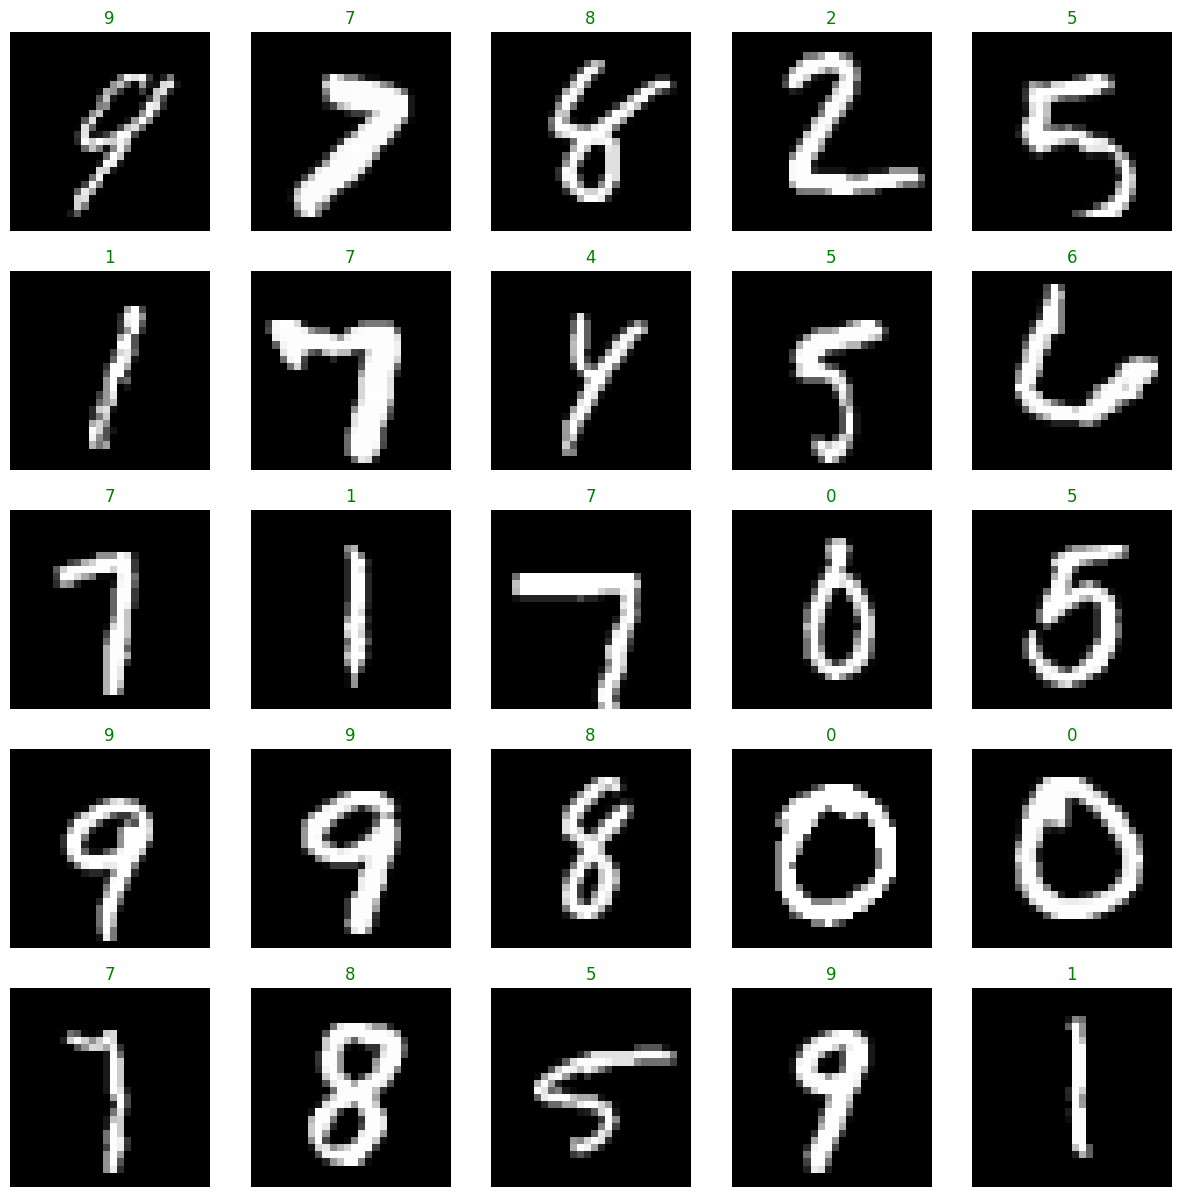

In [38]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for row in range(5):
    for col in range(5):
        idx = random.randint(0, 10000)
        axes[row, col].imshow(test_images[idx])
        axes[row, col].set_title(numbers[np.argmax(predictions[idx])], color="green" if np.argmax(predictions[idx]) == np.argmax(test_labels[idx]) else "red")
        axes[row, col].axis("off")

## Save the model

In [39]:
model1.save("mnist.h5")